In [7]:
import keras
import numpy as np
from keras.datasets import cifar100
#load train and test data set in cifar
(X_train,Y_train),(X_test,Y_test)=cifar100.load_data()
#represent the data in single dimentional 
Y_train = np.squeeze(Y_train)
print('data loaded')
print("The cifiar database has a training set of %d examples." % len(X_train))
print("The cifiar database has a test set of %d examples." % len(X_test))


data loaded
The cifiar database has a training set of 50000 examples.
The cifiar database has a test set of 10000 examples.


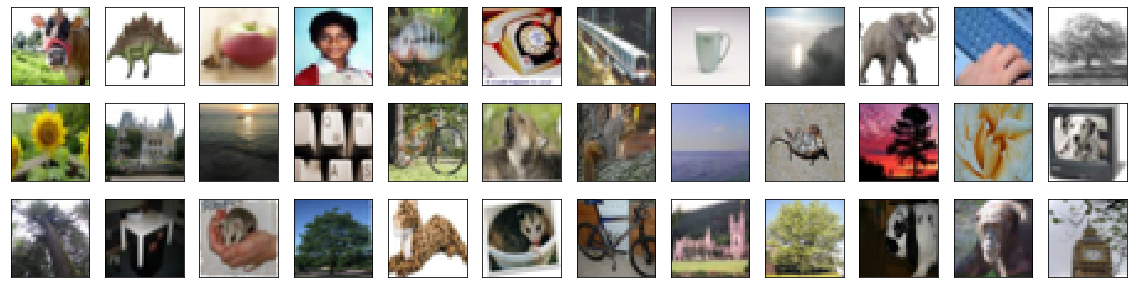

In [8]:
#import numpy module to computation
#import matplotlib to plot the data

import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline
#maintain the size 20by5
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))


In [9]:
#rescale images from [0,1]
X_train=X_train.astype('float64')/255
X_test =X_test.astype('float64')/255

In [10]:
from keras.utils import np_utils   #import all training module
# one-hot encode the labels
num_classes = len(np.unique(Y_train)) #means use the unique values to asssighn to 1 and the others to b zero
Y_train = keras.utils.to_categorical(Y_train, num_classes)#converted the clasees in the form of classification for traimg the data
Y_test = keras.utils.to_categorical(Y_test, num_classes)#converted the clasees in the form of classification for traimg the data

# break training set into training and validation sets
#first the training data starts from 5000 to 50000
#and the validation data starts from zero to 5000
#as same  these process for Xand y  
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

# print shape of training set
#in the form of array 
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')


x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [11]:
#impor keras model layers and libraries to implement the algo 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
#create the model 
model = Sequential()
#16 inputs and 32by 32 input value and 3color channel
#max pooling layer 2by 2 matrix to find the maximum no.
#same padding 
#no stride by defealt 
#activation function
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3))) 
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)        

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [37]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(X_valid, Y_valid),
                    validation_steps=X_valid.shape[0] // batch_size)

ValueError: Error when checking target: expected dense_2 to have shape (10,) but got array with shape (100,)

In [41]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, Y_train, batch_size=2, epochs=10,
          validation_data=(X_valid, Y_valid), callbacks=[checkpointer], 
           verbose=2,shuffle=True)

ValueError: Error when checking target: expected dense_2 to have shape (10,) but got array with shape (100,)

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

In [ ]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))